# Language Information Processing

# Assignement 2: First-two-char input method

##### *Jules Désir*

In [1]:
import os
import random
import time
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict, Counter

from datasets import load_dataset

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataset preparation

### Loading dataset

In [2]:
# https://huggingface.co/datasets/legacy-datasets/wikipedia
# Wikipedia raw English content as of March 1st 2022
dataset = load_dataset("wikipedia", "20220301.en") # Takes approximately 20 to 30 minutes

/opt/homebrew/lib/python3.11/site-packages/datasets/load.py:1491: FutureWarning: The repository for wikipedia contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/wikipedia
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [3]:
dataset.keys() # There is only one split: 'train'

dict_keys(['train'])

### Extracting raw text

In [ ]:
raw_texts = []

for split in dataset.keys(): # Only one iteration of the loop
    for entry in dataset[split]:
        raw_texts.append(entry['text'])

# Write the raw texts to a .txt file
output_file_path = 'wikipedia_texts.txt'

with open(output_file_path, 'w', encoding='utf-8') as file:
    for text in raw_texts:
        file.write(text + '\n')

print(f"Raw texts have been written to {output_file_path}")

### Reducing the size of the raw text because it is too big to be managed by my laptop

In [2]:
def reduce_raw_text(input_file_path: str, output_file_path: str, sentences_nb: int):
    # Open the input file in read mode and output file in write mode
    with open(input_file_path, 'r', encoding='utf-8') as input_file, open(output_file_path, 'w', encoding='utf-8') as output_file:
        # Read the first sentences_nb sentences from the input file
        for k in range(sentences_nb):
            sentence = input_file.readline()
            # If we reach the end of the file before sentences_nb sentences, break
            if not sentence:
                break
            # Write the sentence to the output file
            output_file.write(sentence)

    print(f"The first {sentences_nb} lines have been written to {output_file_path}")

In [3]:
reduced_raw_text_path = 'reduced_raw_text_wikipedia_en_20220301.txt'

# Here: the 100 first lines
reduce_raw_text('raw_text_wikipedia_en_20220301.txt', reduced_raw_text_path, 100)

The first 100 lines have been written to reduced_raw_text_wikipedia_en_20220301.txt


### Dataset discovery

In [4]:
# Open the file in read mode and print its contents
with open(reduced_raw_text_path, 'r', encoding='utf-8') as file:
    content = file.read()
    print(content)

Anarchism is a political philosophy and movement that is sceptical of authority and rejects all involuntary, coercive forms of hierarchy. Anarchism calls for the abolition of the state, which it holds to be unnecessary, undesirable, and harmful. As a historically left-wing movement, placed on the farthest left of the political spectrum, it is usually described alongside communalism and libertarian Marxism as the libertarian wing (libertarian socialism) of the socialist movement, and has a strong historical association with anti-capitalism and socialism.

Humans lived in societies without formal hierarchies long before the establishment of formal states, realms, or empires. With the rise of organised hierarchical bodies, scepticism toward authority also rose. Although traces of anarchist thought are found throughout history, modern anarchism emerged from the Enlightenment. During the latter half of the 19th and the first decades of the 20th century, the anarchist movement flourished in 

### Word extraction

In [5]:
# Function to read the file and extract words
def extract_words_from_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
    except UnicodeDecodeError: # To avoid UnicodeDecodeError when not utf-8 encoding
        with open(file_path, 'r', encoding='latin-1') as file:
            content = file.read()
    
    # Word segmentation
    words = content.split()
    return words

In [6]:
# Extract words from the file
words_list = extract_words_from_file(reduced_raw_text_path)
print(words_list)

['Anarchism', 'is', 'a', 'political', 'philosophy', 'and', 'movement', 'that', 'is', 'sceptical', 'of', 'authority', 'and', 'rejects', 'all', 'involuntary,', 'coercive', 'forms', 'of', 'hierarchy.', 'Anarchism', 'calls', 'for', 'the', 'abolition', 'of', 'the', 'state,', 'which', 'it', 'holds', 'to', 'be', 'unnecessary,', 'undesirable,', 'and', 'harmful.', 'As', 'a', 'historically', 'left-wing', 'movement,', 'placed', 'on', 'the', 'farthest', 'left', 'of', 'the', 'political', 'spectrum,', 'it', 'is', 'usually', 'described', 'alongside', 'communalism', 'and', 'libertarian', 'Marxism', 'as', 'the', 'libertarian', 'wing', '(libertarian', 'socialism)', 'of', 'the', 'socialist', 'movement,', 'and', 'has', 'a', 'strong', 'historical', 'association', 'with', 'anti-capitalism', 'and', 'socialism.', 'Humans', 'lived', 'in', 'societies', 'without', 'formal', 'hierarchies', 'long', 'before', 'the', 'establishment', 'of', 'formal', 'states,', 'realms,', 'or', 'empires.', 'With', 'the', 'rise', 'of'

### Creating a dictionary with each couple of first 2 letters mapped to the corresponding complete words

In [7]:
def dictionary(words_list):
    d = dict()
    for word in words_list:
        if word[:2] not in d.keys():
            d[word[:2]] = [word]
        else:
            d[word[:2]].append(word)
    return d

In [8]:
d = dictionary(words_list)
print(len(d), '\n\n', d)

298 

 {'An': ['Anarchism', 'Anarchism', 'Anarchists', 'Anarchism', 'Anarchist', 'Ancient', 'Anarchism', 'Anarchism', 'Anarchism', 'Anarchic', 'Antigone', 'Anarchists', 'Anarcho-communists,', 'Anarchist', 'Anarchism', 'Anarchists', 'Anarchist', 'Anarchist', 'Anarchism', "Anarchism's", 'Anarchism', 'Anarcho-communism', 'Anarcho-communism', 'Anarcho-syndicalism', 'Anarchist', 'Anarchism', 'Anarchists', 'Anarchist', "Anarchists'", 'Anarchist', 'Anarchists', 'Anarchists', 'Anarchist', 'Anarcho-pacifists', 'Anarchists', 'Anarchists', 'Anarchists', 'Anarchists', 'Anarchists', 'Anarchists', 'Anarchists', 'Anarchists', 'Anarchists'], 'is': ['is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'issues'], 'a': ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a

In [9]:
# Function to get the word list and the dictionary corresponding to a dataset
def data_prep(dataset: str):
    # Word segmentation: split the words using spaces ' '
    words_list = dataset.split()
    d = dictionary(words_list)
    
    return words_list, d

### Split the (reduced) dataset in 3 subsets: training, validation and test

In [10]:
def data_split(input_file_path: str, val_portion: int = 0.2, test_portion: int = 0.2):
    # Ensure val_portion and test_portion are between 0 and 1 and their sum is less than 1
    if not (0 <= val_portion <= 1 and 0 <= test_portion <= 1 and val_portion + test_portion <= 1):
        raise ValueError("val_portion and test_portion must be between 0 and 1, and their sum must be less than or equal to 1.")
    
    # Read the input file and count the total number of lines
    with open(input_file_path, 'r', encoding='utf-8') as input_file:
        lines = input_file.readlines()
    
    total_lines = len(lines)
    val_count = int(total_lines * val_portion)
    test_count = int(total_lines * test_portion)
    remaining_count = total_lines - val_count - test_count
    
    # Split the lines into three parts
    train_set = ''.join(lines[:remaining_count])
    val_set = ''.join(lines[remaining_count:remaining_count + val_count])
    test_set = ''.join(lines[remaining_count + val_count:])
    
    # Define output file paths
    train_file_path = 'train_set.txt'
    val_file_path = 'val_set.txt'
    test_file_path = 'test_set.txt'
    
    # Write the lines to the respective output files
    with open(train_file_path, 'w', encoding='utf-8') as train_file:
        train_file.writelines(train_set)
    print(f"Train text has been written to {train_file_path}")
    with open(val_file_path, 'w', encoding='utf-8') as val_file:
        val_file.writelines(val_set)
    print(f"Validation text has been written to {val_file_path}")
    with open(test_file_path, 'w', encoding='utf-8') as test_file:
        test_file.writelines(test_set)
    print(f"Test text has been written to {test_file_path}")
    
    return train_set, val_set, test_set

In [11]:
 train_set, val_set, test_set = data_split(reduced_raw_text_path) # Default proportions : 20% val, 20% test

Train text has been written to train_set.txt
Validation text has been written to val_set.txt
Test text has been written to test_set.txt


In [12]:
print(f"{train_set=}")
print(f"\n\n{val_set=}")
print(f"\n\n{test_set=}")

train_set='Anarchism is a political philosophy and movement that is sceptical of authority and rejects all involuntary, coercive forms of hierarchy. Anarchism calls for the abolition of the state, which it holds to be unnecessary, undesirable, and harmful. As a historically left-wing movement, placed on the farthest left of the political spectrum, it is usually described alongside communalism and libertarian Marxism as the libertarian wing (libertarian socialism) of the socialist movement, and has a strong historical association with anti-capitalism and socialism.\n\nHumans lived in societies without formal hierarchies long before the establishment of formal states, realms, or empires. With the rise of organised hierarchical bodies, scepticism toward authority also rose. Although traces of anarchist thought are found throughout history, modern anarchism emerged from the Enlightenment. During the latter half of the 19th and the first decades of the 20th century, the anarchist movement f

## First method: word 1-gram language model

### Helper functions

In [13]:
def f_x_i(d: dict, x: str):
    # Initialize the count
    count = 0

    # Iterate through each key and each string in the values of the key
    for key in d.keys():
        for string in d[key]:
            if string == x:
                count += 1
                
    return count

In [14]:
def f_y_x_i(d: dict, y: str, x: str):
    # If no word in the training set begins with the first 2 letters y
    if y not in d.keys():
        return 0
    
    # Initialize the count
    count = 0

    # Count the occurences of x in d[y]
    for string in d[y]:
        if string == x:
            count += 1

    return count

### Probability functions

In [15]:
def P_y_x_i(d: dict, y: str, x: str):
    return f_y_x_i(d, y, x) / f_x_i(d, x)

In [16]:
def P_x_i(words_list: list[str], d: dict, x: str, sum_f_x: int):
    return f_x_i(d, x) / sum_f_x

### Argmax function

In [17]:
# Function to find the word x that maximizes P(y|x) * P(x)
def argmax_P_y_x_P_x_1_gram(words_list: list[str], d: dict, y: str):
    # Get a list of all the words without redundancies
    words_set = set(words_list)
    
    sum_f_x = sum([f_x_i(d, x_i) for x_i in words_list])
    
    max_product = -1
    argmax_x = None

    for x in words_set:
        product = P_y_x_i(d, y, x) * P_x_i(words_list, d, x, sum_f_x)
        if product > max_product:
            max_product = product
            argmax_x = x
    
    return argmax_x

### Final function

In [18]:
def first_2_char_input_method_1_gram(dataset: str, concatenated_2_char: str):
    words_list, d = data_prep(dataset)
    
    # Ensure the length of concatenated_2_char is even
    if len(concatenated_2_char) % 2:
        print("The input string must have an even number of characters.")
        # Remove the last character to get an even number of characters
        concatenated_2_char = concatenated_2_char[:-1]
        
    results = []
    for i in range(0, len(concatenated_2_char), 2):
        y = concatenated_2_char[i:i+2]
        result = argmax_P_y_x_P_x_1_gram(words_list, d, y)
        results.append(result)
    
    return ' '.join(results)

In [19]:
# Test
pred = first_2_char_input_method_1_gram(train_set, 'Huliinsowifohilobethesoffostreorem')
print(pred)

# Expected output:
# 'Humans lived in societies without formal hierarchies long before the establishment of
# formal states, realms, or empires.'

Humans libertarian in socialist with for his long be the espoused of for state revolutionary or emphasises


## Second method: word 2-gram language model

We keep the function P_y_x_i as before but we replace P_x_i by another function.

### Helper function

In [20]:
# Count the occurrences of each possible bigram
def count_bigrams(words_list):
    bigram_counts = defaultdict(Counter)
    
    for i in range(len(words_list) - 1):
        bigram_counts[words_list[i]][words_list[i + 1]] += 1
    
    return bigram_counts

### Probability function

In [21]:
# Calculate the conditional probabilities of each word given the previous one
def calculate_probabilities(bigram_counts):
    probabilities = defaultdict(dict)
    
    for word, next_words in bigram_counts.items():
        total_count = sum(next_words.values())
        for next_word, count in next_words.items():
            probabilities[word][next_word] = count / total_count
    
    return probabilities

In [22]:
# To train a bigram model on a list of words, we apply successively count_bigrams then calculate_probabilities)
def train_bigram_model(words_list):
    bigram_counts = count_bigrams(words_list)
    probabilities = calculate_probabilities(bigram_counts)
    return probabilities

### Argmax function

In [23]:
# Function to find the word x that maximizes P(y|x) * P(x)
def argmax_P_y_x_P_x_2_gram(words_list: list[str], d: dict, y: str):
    # Get a list of all words in the dictionary without redundancies
    words_set = set(words_list)
    
    # Get the probabilities
    probabilities = train_bigram_model(words_list)
    
    max_product = -1
    argmax_x = None

    for previous_word in words_set:
        for x in probabilities[previous_word].keys():
            product = P_y_x_i(d, y, x) * probabilities[previous_word][x]
            if product > max_product:
                max_product = product
                argmax_x = x
    
    return argmax_x

### Final function

In [24]:
def first_2_char_input_method_2_gram(dataset: str, concatenated_2_char: str):
    words_list, d = data_prep(dataset)
    
    # Ensure the length of concatenated_2_char is even
    if len(concatenated_2_char) % 2:
        print("The input string must have an even number of characters.")
        # Remove the last character to get an even number of characters
        concatenated_2_char = concatenated_2_char[:-1]

    results = []
    for i in range(0, len(concatenated_2_char), 2):
        y = concatenated_2_char[i:i+2]
        result = argmax_P_y_x_P_x_2_gram(words_list, d, y)
        results.append(result)
    
    return ' '.join(results)

In [25]:
# Test
pred = first_2_char_input_method_2_gram(train_set, 'Huliinsowifohilobethesoffostreorem')
print(pred)

# Expected output:
# 'Humans lived in societies without formal hierarchies long before the establishment of
# formal states, realms, or empires.'

Humans liberals, in socialists with for historical long become the especially of for state region or emphasis


## Overall function (with model selection)

In [26]:
def prediction(input_2_char: str, model: str, train_set: str):
    # Data preparation
    words_list, d = data_prep(train_set)
    
    # Prediction with the chosen model
    if model not in {'1-gram', '2-gram'}:
        raise ValueError("The chosen model must be either '1-gram' or '2-gram'.")
    elif model == '1-gram': # 1-gram model
        pred = first_2_char_input_method_1_gram(train_set, input_2_char)
    elif model == '2-gram': # 2-gram model
        pred = first_2_char_input_method_2_gram(train_set, input_2_char)
    
    return pred

In [27]:
# Test
pred = prediction(input_2_char='Huliinsowifohilobethesoffostreorem', model='1-gram', train_set=train_set)
print(pred)

# Expected output:
# 'Humans lived in societies without formal hierarchies long before the establishment of
# formal states, realms, or empires.'

Humans libertarian in socialist with for his long be the espoused of for state revolutionary or emphasises


## Accuracy

In [28]:
def accuracy(prediction, groundtruth):    
    pred_words = prediction.split()
    ground_truth_words = groundtruth.split()
    
    total_pred = len(ground_truth_words)
    
    correc_pred = 0
    for i in range(total_pred):
        if pred_words[i] == ground_truth_words[i]:
            correc_pred += 1
    
    return correc_pred / total_pred

In [29]:
# Test
accuracy(pred, 'Humans lived in societies without formal hierarchies long before the establishment of formal states, realms, or empires.')

0.35294117647058826

## Training a model on a training set and evaluating it on a validation set

In [30]:
def evaluate_model(model: str, input_file_path: str, clean_dataset: bool = False, val_portion: int = 0.2, test_portion: int = 0.2):
    # Measure execution time
    start_time = time.perf_counter()
    
    # Data splitting and preparation
    train_set, val_set = data_split(input_file_path, val_portion, test_portion)[:2]
    
    if clean_dataset:
        # Clean the dataset: convert to lowercase and remove punctuation
        val_set = val_set.lower().translate(str.maketrans('', '', string.punctuation))
        train_set = train_set.lower().translate(str.maketrans('', '', string.punctuation))

    
    words_list_val = data_prep(val_set)[0]
    list_input_2_char = [word[:2] if len(word) >= 2 else word + ' ' for word in words_list_val]
    concatenated_input_2_char = ''.join(list_input_2_char)
    
    # Vocabulary
    vocab = len(set(data_prep(train_set)[0]))
    
    # Prediction
    pred = prediction(input_2_char=concatenated_input_2_char, model=model, train_set=train_set)
    
    # Prints
    print(f'\n\nInput: {concatenated_input_2_char=}')
    print(f'\n\nGround-truth: {val_set=}')
    print(f'\n\nPrediction: {pred=}')
    
    # Accuracy
    acc = accuracy(pred, val_set)
    
    end_time = time.perf_counter()
    execution_time = end_time - start_time
    print(f'\n\n{execution_time=} seconds')
    
    return pred, vocab, acc, execution_time

In [97]:
# Test
reduce_raw_text('raw_text_wikipedia_en_20220301.txt', 'reduced_raw_text_wikipedia_en_20220301.txt', 100)
pred, vocab, acc, execution_time = evaluate_model(model='1-gram', input_file_path='reduced_raw_text_wikipedia_en_20220301.txt', clean_dataset=True)
print(f'\n\n{acc=}\n\n{vocab=} words')

The first 100 lines have been written to reduced_raw_text_wikipedia_en_20220301.txt
Train text has been written to train_set.txt
Validation text has been written to val_set.txt
Test text has been written to test_set.txt


Input: concatenated_input_2_char='inanisa seofsetrofthwithanmothemthinanthwiovankiofexdeeainoninfoofaninwigomastanhedaththmacoinanata smyedifoofboaraninasweasyoanouinwhbeknasilaninrepoancoanpruncorasomoofthleininthanmodealmointhanmowhleacneweaninorasthmosh21cerawiemofanprsia reofinanhacotogemaphanmoattiecdrupvasoancodicotocrnephapthantrofclanhareprwicocuconecowhemblbldehareanhiaswichanviitpuhaallemoscinfisuasananhitoenwithanmoalcoanfaacovacthvaangrteanscofthextomaitditodethcoanmowhthanachaesrestcoofanprthisnocoonwhprarcoancodemuanratha sianinwhcoprarshbescofanwheagrprthprdigeeqcabea copralitraasa hiprtoanthananargecoagcoauinalfonaalceanhifoofgoegmoredestsoetecclsyegcabofesletaureegfuisrocaetpahewhsuanimanscdionthmebywhthfoshbeopthprofeqliiscltoanpoetinthittrbothlianso

## Evaluating the performance of the 2 methods in different configurations

In [33]:
# Define the list of the sentence numbers, models, and clean_dataset options
sentences_nb_list = [10, 20, 40, 50, 100, 200, 400]
models = ['1-gram', '2-gram']
clean_dataset_options = [False, True]

# Calculate the total number of iterations
total_iterations = len(sentences_nb_list) * len(models) * len(clean_dataset_options)
current_iteration = 0

# Initialize an empty list to store results
results = []

# Loop over all combinations of sentence numbers, models, and clean_dataset options
for sentence_nb in sentences_nb_list:
    # Reduce the dataset with the current sentence nb
    reduce_raw_text('raw_text_wikipedia_en_20220301.txt', 'reduced_raw_text_wikipedia_en_20220301.txt', sentence_nb)
    for model in models:
        for clean_dataset in clean_dataset_options:
            # Evaluate the model with the current combination of parameters
            pred, vocab, acc, execution_time = evaluate_model(model=model, input_file_path='reduced_raw_text_wikipedia_en_20220301.txt', clean_dataset=clean_dataset)

            # Append the results to the list
            results.append({
                'sentence_nb': sentence_nb,
                'model': model,
                'clean_dataset': clean_dataset,
                'pred': pred,
                'vocab': vocab,
                'acc': acc,
                'execution_time': execution_time
            })
            
            # Increment the iteration counter
            current_iteration += 1
            # Print progress
            print(f'{current_iteration}/{total_iterations} model evaluations finished\n################################################\n\n')

# Convert the list of results to a pandas dataframe
df = pd.DataFrame(results)

The first 10 lines have been written to reduced_raw_text_wikipedia_en_20220301.txt
Train text has been written to train_set.txt
Validation text has been written to val_set.txt
Test text has been written to test_set.txt


Input: concatenated_input_2_char='Etteande'


Ground-truth: val_set='Etymology, terminology, and definition \n\n'


Prediction: pred='decades decades and decades'


execution_time=0.05126841604942456 seconds
1/28 model evaluations finished
################################################


Train text has been written to train_set.txt
Validation text has been written to val_set.txt
Test text has been written to test_set.txt


Input: concatenated_input_2_char='etteande'


Ground-truth: val_set='etymology terminology and definition \n\n'


Prediction: pred='decades decades and decades'


execution_time=0.031561165989842266 seconds
2/28 model evaluations finished
################################################


Train text has been written to train_set.txt
Validation text



Input: concatenated_input_2_char='WhthtelihabelasywianitmehamorediwiwiadfriddigrinbothNeLeanliMawhdonoasthwiausoora vapaanexculiwharprcowiciliAdsoanuslisotoavannecoanemitcowisoAnisbrustodethanwiofthsomoAniscotosofowharstorfrabScofangehiansocrancratatcrdibethtwSoscdeanashamainfrlianbeboliansobumosowhmoscreanasa miofanprWhoptothstiscetoanthdeanisnoaneatafoscasthisa loofdiamscananonthmaanvacupeansldiMadeelinthwifoa nosothreofthstapthbethhunaalhutoexinorprtosua nosoana suonhotoactoputhidofan'


Ground-truth: val_set="While the term libertarian has been largely synonymous with anarchism, its meaning has more recently diluted with wider adoption from ideologically disparate groups, including both the New Left and libertarian Marxists, who do not associate themselves with authoritarian socialists or a vanguard party, and extreme cultural liberals, who are primarily concerned with civil liberties. Additionally, some anarchists use libertarian socialist to avoid anarchism's negative connotati



Input: concatenated_input_2_char='inmeeuthwanoanacexsoasremothanotmumolagabitoreaninthsaemmacafoanegsoanthabofmoontobesoexbyemkai inbaresepragthstineuvasedeananlitereininanduthreaninprjuduthrereelofansepainfrenchtoinauseanreanthreofth17an18alspthiddeofwhbetherofclanmoerduthfrrepagrsuasthenanthsaa tupointhfeofananfesethfiancudethth18ceaswigoesphaninenmodethstmastthpathwatoinanpiprthofmufofesoinfrbythla18vaanscofthhabeweana waofthunglocfr18to19therofclanlaunthenofthspciwaaniscothgoagofandrfrmumibafocoananenthinwoasa clwounlaknasthfiinthfoin18toundirecuthinbea sipofowikamabea lefiana meofitgecobafathjufeanprfothmuopstsoadpoabansmprhoafbidithbaweexfrthinbythmaatth18hacoanwetrsiinthseinbeulexin18bafaprthifregapobymatethwoenupthnetyofwoinretothexfrthfiinanfothstiminunthinofpekra ruphanscanovwicoanwhdrinfrth18pacoadfofrfeanfothdiofgoactoonne'


Ground-truth: val_set='in medieval europe there was no anarchistic activity except some ascetic religious movements these and other muslim movements



Input: concatenated_input_2_char='inmeeuthwanoanacexsoasremothanotmumolagabitoreaninthsaemmacafoanegsoanthabofmoontobesoexbyemkai inbaresepragthstineuvasedeananlitereininanduthreaninprjuduthrereelofansepainfrenchtoinauseanreanthreofth17an18alspthiddeofwhbetherofclanmoerduthfrrepagrsuasthenanthsaa tupointhfeofananfesethfiancudethth18ceaswigoesphaninenmodethstmastthpathwatoinanpiprthofmufofesoinfrbythla18vaanscofthhabeweana waofthunglocfr18to19therofclanlaunthenofthspciwaaniscothgoagofandrfrmumibafocoananenthinwoasa clwounlaknasthfiinthfoin18toundirecuthinbea sipofowikamabea lefiana meofitgecobafathjufeanprfothmuopstsoadpoabansmprhoafbidithbaweexfrthinbythmaatth18hacoanwetrsiinthseinbeulexin18bafaprthifregapobymatethwoenupthnetyofwoinretothexfrthfiinanfothstiminunthinofpekra ruphanscanovwicoanwhdrinfrth18pacoadfofrfeanfothdiofgoactoonne'


Ground-truth: val_set='in medieval europe there was no anarchistic activity except some ascetic religious movements these and other muslim movements



Input: concatenated_input_2_char='drfrmumibafocoananenthinwoasa clwounlaknasthfiinthfoin18toundirecuthinbea sipofowikamabea lefiana meofitgecobafathjufeanprfothmuopstsoadpoabansmprhoafbidithbaweexfrthinbythmaatth18hacoanwetrsiinthseinbeulexin18bafaprthifregapobymatethwoenupthnetyofwoinretothexfrthfiinanfothstiminunthinofpekra ruphanscanovwicoanwhdrinfrth18pacoadfofrfeanfothdiofgoactoonneatthtuofthceanhaspalovthwoitwaa nofeofthinsymoinchsmgrofstimthhuprveofantowaa hoforeyofrcoofthfaeatrtothjacatostinlaamarwaa stfoanwhitbethmoprleidduthtia miofanadtaofrepovithstbeknasprofthdethdiofthfrsomoinmagranthexanexofmacotopecofothsuofthpacofainpoexanacevthmaandithfrthteacincaupthmoanatwematoexthframiminthimacof19alcathanexacilwaanstwhsoanadduthpedecoanenpainthrureinoptothwhmohothmehasuafthbogowastseanfrpeanmofltouknoletothkrreannemastinthfrtewithanbecrinrutwneancuemnaplansyanthfosotocra cogrthwopuforewhthlaweaganthworea popasethviofthbointhocreanthreruciwamawoanactutocopawhgratthexofananotsomoin



Input: concatenated_input_2_char='DrfrmuMiBafocoananenthInWoAsa clwounlaknasthFiInthfoin18toundirecuThInbea sipofowiKaMabea lefiana meofitGeCoBafa(tJuFeanPrfo(tmuopstsoadpoabansmprhoAfbidithBaweexfrthInbythMaatth18HaCoAnwetrsiinthSeInbeulexin18BafaprthifregapobyMatethwoenupthnetyofwoInretothexfrthFiInanfothStImInUnthinofPeKra RuphanscanovwicoAnwhdrinfrth18PaCoadfofrfeanfothdiofgoactoonneAtthtuofthceanhaspalovthwoItwaa nofeofthinsymoInChsmgrofstimthhuprveofanTowaa hoforeyofrcoofthfaeatrtothJacatostInLaAmArwaa stfoanwhitbethmoprleidDuthtia miofanadtaofrepoviThstbeknasprofthdeThdiofthFrsomoinmagranthexanexofmaCotopecofothsuofthPaCofainpoexanacEvthmaandithfrthteacincaupthmoanatwematoexthfrAmiminthImAcof19alcathAnExAcIlwaanstwhsoanadduthpeDecoanenpainthRuReinoptothWhmohothmehasuafthBogowastSeanfrPeanMofltoUknoletothKrreanNeMastinthFrTeWithanbecrinRutwneancuemnaplansyanThfosotocra cogrthwopuforewhthlaweaganthworea popaSethviofthBointhOcReanthreRuCiWamawoanactutocopawhgratthexofananotsomoIn



Input: concatenated_input_2_char='drfrmumibafocoananenthinwoasa clwounlaknasthfiinthfoin18toundirecuthinbea sipofowikamabea lefiana meofitgecobafathjufeanprfothmuopstsoadpoabansmprhoafbidithbaweexfrthinbythmaatth18hacoanwetrsiinthseinbeulexin18bafaprthifregapobymatethwoenupthnetyofwoinretothexfrthfiinanfothstiminunthinofpekra ruphanscanovwicoanwhdrinfrth18pacoadfofrfeanfothdiofgoactoonneatthtuofthceanhaspalovthwoitwaa nofeofthinsymoinchsmgrofstimthhuprveofantowaa hoforeyofrcoofthfaeatrtothjacatostinlaamarwaa stfoanwhitbethmoprleidduthtia miofanadtaofrepovithstbeknasprofthdethdiofthfrsomoinmagranthexanexofmacotopecofothsuofthpacofainpoexanacevthmaandithfrthteacincaupthmoanatwematoexthframiminthimacof19alcathanexacilwaanstwhsoanadduthpedecoanenpainthrureinoptothwhmohothmehasuafthbogowastseanfrpeanmofltouknoletothkrreannemastinthfrtewithanbecrinrutwneancuemnaplansyanthfosotocra cogrthwopuforewhthlaweaganthworea popasethviofthbointhocreanthreruciwamawoanactutocopawhgratthexofananotsomoin



Input: concatenated_input_2_char='Inanisa seofsetrofthwithanmothemthinanthwiovankiofexdeEainoninfoofaninWiGoMaStanHeDaThThmacoinanata smyedifoofBoaraninasweasyoanouinwhbeknasilaninrePoancoAnpruncorasomoofthleIninthanmodealmointhanmowhleacneweaninorAsthmosh21cerawiemofanprsia reofinAnhacotogemaphanmoattiecdrupvasoancodicotocrnephapThantrofclanhareprwicocuConecowhemblbldehareanhiaswichanviItpuhaallemoscinfisuasananhitoenwithanmoalcoanfaacovacthVaangrteanscofthextomaitditodethcoanmoWhthanachaes"rstcoofanprthisnocoonwhprarcoancodemuanratha sianinwhcoprarshbescofanwheagrprthprdiGeeqcabea copralitraasa hiprtoanthanAnargecoagcoauinalfona"aceanhifoofgo(emoredestsoetecclsy(ecaBofesletaure(efuIsRoCaetpahewhsuanimAnscdionthmebywhthfoshbeopThprofeqliiscltoanpoetinthittrbothliansotrThenthlianeqcabeimwithstreinthquofalfoofdoanhiTaAntatavafobuingesetwmagonatofiopthEsansetopranetanreananviofsoilthunofmeanenA brcacabemabeaitodeopstaninbyremeononhaanaitochsothevmeonthotEvtaemnoreviantaa graptoanaialth



Input: concatenated_input_2_char='inanisa seofsetrofthwithanmothemthinanthwiovankiofexdeeainoninfoofaninwigomastanhedaththmacoinanata smyedifoofboaraninasweasyoanouinwhbeknasilaninrepoancoanpruncorasomoofthleininthanmodealmointhanmowhleacneweaninorasthmosh21cerawiemofanprsia reofinanhacotogemaphanmoattiecdrupvasoancodicotocrnephapthantrofclanhareprwicocuconecowhemblbldehareanhiaswichanviitpuhaallemoscinfisuasananhitoenwithanmoalcoanfaacovacthvaangrteanscofthextomaitditodethcoanmowhthanachaesrestcoofanprthisnocoonwhprarcoancodemuanratha sianinwhcoprarshbescofanwheagrprthprdigeeqcabea copralitraasa hiprtoanthananargecoagcoauinalfonaalceanhifoofgoegmoredestsoetecclsyegcabofesletaureegfuisrocaetpahewhsuanimanscdionthmebywhthfoshbeopthprofeqliiscltoanpoetinthittrbothliansotrthenthlianeqcabeimwithstreinthquofalfoofdoanhitaantatavafobuingesetwmagonatofiopthesansetopranetanreananviofsoilthunofmeanena brcacabemabeaitodeopstaninbyremeononhaanaitochsothevmeonthotevtaemnoreviantaa graptoanaialth



Input: concatenated_input_2_char='Inanisa seofsetrofthwithanmothemthinanthwiovankiofexdeEainoninfoofaninWiGoMaStanHeDaThThmacoinanata smyedifoofBoaraninasweasyoanouinwhbeknasilaninrePoancoAnpruncorasomoofthleIninthanmodealmointhanmowhleacneweaninorAsthmosh21cerawiemofanprsia reofinAnhacotogemaphanmoattiecdrupvasoancodicotocrnephapThantrofclanhareprwicocuConecowhemblbldehareanhiaswichanviItpuhaallemoscinfisuasananhitoenwithanmoalcoanfaacovacthVaangrteanscofthextomaitditodethcoanmoWhthanachaes"rstcoofanprthisnocoonwhprarcoancodemuanratha sianinwhcoprarshbescofanwheagrprthprdiGeeqcabea copralitraasa hiprtoanthanAnargecoagcoauinalfona"aceanhifoofgo(emoredestsoetecclsy(ecaBofesletaure(efuIsRoCaetpahewhsuanimAnscdionthmebywhthfoshbeopThprofeqliiscltoanpoetinthittrbothliansotrThenthlianeqcabeimwithstreinthquofalfoofdoanhiTaAntatavafobuingesetwmagonatofiopthEsansetopranetanreananviofsoilthunofmeanenA brcacabemabeaitodeopstaninbyremeononhaanaitochsothevmeonthotEvtaemnoreviantaa graptoanaialth



Input: concatenated_input_2_char='inanisa seofsetrofthwithanmothemthinanthwiovankiofexdeeainoninfoofaninwigomastanhedaththmacoinanata smyedifoofboaraninasweasyoanouinwhbeknasilaninrepoancoanpruncorasomoofthleininthanmodealmointhanmowhleacneweaninorasthmosh21cerawiemofanprsia reofinanhacotogemaphanmoattiecdrupvasoancodicotocrnephapthantrofclanhareprwicocuconecowhemblbldehareanhiaswichanviitpuhaallemoscinfisuasananhitoenwithanmoalcoanfaacovacthvaangrteanscofthextomaitditodethcoanmowhthanachaesrestcoofanprthisnocoonwhprarcoancodemuanratha sianinwhcoprarshbescofanwheagrprthprdigeeqcabea copralitraasa hiprtoanthananargecoagcoauinalfonaalceanhifoofgoegmoredestsoetecclsyegcabofesletaureegfuisrocaetpahewhsuanimanscdionthmebywhthfoshbeopthprofeqliiscltoanpoetinthittrbothliansotrthenthlianeqcabeimwithstreinthquofalfoofdoanhitaantatavafobuingesetwmagonatofiopthesansetopranetanreananviofsoilthunofmeanena brcacabemabeaitodeopstaninbyremeononhaanaitochsothevmeonthotevtaemnoreviantaa graptoanaialth



Input: concatenated_input_2_char='Whfeanedinhasutothmomateofanscamthrefochauanreonrerathinasa temehaspammaedinJuSunathscasexanscnathFrSkSaCrinthUnStwhispaofa wiAmneofscthSeLeCoinBrEnanthPaScinSpAnanthstObtothstanitinisa siqunoofanAncothstasa toofdoanbeittobeilreofitpoteInofpebeabtocothasofthlimadeartabya smelAuulresoonporeofwhthpoisoportrasitsthathabtocopeAnanaragstisththpecoa goevthmoalamofwiunsetogamopoletocoAncothidththstisthcowiofthpetobeanunfidutothfaththruclisdifrthreofsoSpanattothstvaRoPaWobeththtebeauanauwomethstconebeleBasathstasme"cdobymeofcocaifpobuunanovifnebeA.JoSianLeGrwhletophanbeththstcobeleifitisgobycoalthsathashiunBeonhotoabthstaldiAnantharThcobeananarwaquprduthclerofanesamarcuthwededuthersuasfusuanotInlianwamoaswithNeApanthnemoInmuanhabeaswimuscsuaspuAnsuasLeToanHeRestththbobetharanthnowhsearfra daacisa coprbythalcabycaanitprhufrlia joliOtanadfoorusarasa metoacanenInhiboBrthSpA HiofAnFiViGuanDiNiChRoclth"aprhainstmoviacThth20cemapran(PKrEmGoGuLaanCaBeanpusuasAnwrab



Input: concatenated_input_2_char='whfeanedinhasutothmomateofanscamthrefochauanreonrerathinasa temehaspammaedinjusunathscasexanscnathfrsksacrinthunstwhispaofa wiamneofscthselecoinbrenanthpascinspananthstobtothstanitinisa siqunoofanancothstasa toofdoanbeittobeilreofitpoteinofpebeabtocothasofthlimadeartabya smelauulresoonporeofwhthpoisoportrasitsthathabtocopeananaragstisththpecoa goevthmoalamofwiunsetogamopoletocoancothidththstisthcowiofthpetobeanunfidutothfaththruclisdifrthreofsospanattothstvaropawobeththtebeauanauwomethstconebelebasathstasmecodobymeofcocaifpobuunanovifnebea josianlegrwhletophanbeththstcobeleifitisgobycoalthsathashiunbeonhotoabthstaldianantharthcobeananarwaquprduthclerofanesamarcuthwededuthersuasfusuanotinlianwamoaswithneapanthnemoinmuanhabeaswimuscsuaspuansuasletoanherestththbobetharanthnowhsearfra daacisa coprbythalcabycaanitprhufrlia joliotanadfoorusarasa metoacaneninhibobrthspa hiofanfiviguandinichroclthanprhainstmoviacthth20cemapranpekremgogulaancabeanpusuasanwrab



Input: concatenated_input_2_char='Whfeanedinhasutothmomateofanscamthrefochauanreonrerathinasa temehaspammaedinJuSunathscasexanscnathFrSkSaCrinthUnStwhispaofa wiAmneofscthSeLeCoinBrEnanthPaScinSpAnanthstObtothstanitinisa siqunoofanAncothstasa toofdoanbeittobeilreofitpoteInofpebeabtocothasofthlimadeartabya smelAuulresoonporeofwhthpoisoportrasitsthathabtocopeAnanaragstisththpecoa goevthmoalamofwiunsetogamopoletocoAncothidththstisthcowiofthpetobeanunfidutothfaththruclisdifrthreofsoSpanattothstvaRoPaWobeththtebeauanauwomethstconebeleBasathstasme"cdobymeofcocaifpobuunanovifnebeA.JoSianLeGrwhletophanbeththstcobeleifitisgobycoalthsathashiunBeonhotoabthstaldiAnantharThcobeananarwaquprduthclerofanesamarcuthwededuthersuasfusuanotInlianwamoaswithNeApanthnemoInmuanhabeaswimuscsuaspuAnsuasLeToanHeRestththbobetharanthnowhsearfra daacisa coprbythalcabycaanitprhufrlia joliOtanadfoorusarasa metoacanenInhiboBrthSpA HiofAnFiViGuanDiNiChRoclth"aprhainstmoviacThth20cemapran(PKrEmGoGuLaanCaBeanpusuasAnwrab



Input: concatenated_input_2_char='whfeanedinhasutothmomateofanscamthrefochauanreonrerathinasa temehaspammaedinjusunathscasexanscnathfrsksacrinthunstwhispaofa wiamneofscthselecoinbrenanthpascinspananthstobtothstanitinisa siqunoofanancothstasa toofdoanbeittobeilreofitpoteinofpebeabtocothasofthlimadeartabya smelauulresoonporeofwhthpoisoportrasitsthathabtocopeananaragstisththpecoa goevthmoalamofwiunsetogamopoletocoancothidththstisthcowiofthpetobeanunfidutothfaththruclisdifrthreofsospanattothstvaropawobeththtebeauanauwomethstconebelebasathstasmecodobymeofcocaifpobuunanovifnebea josianlegrwhletophanbeththstcobeleifitisgobycoalthsathashiunbeonhotoabthstaldianantharthcobeananarwaquprduthclerofanesamarcuthwededuthersuasfusuanotinlianwamoaswithneapanthnemoinmuanhabeaswimuscsuaspuansuasletoanherestththbobetharanthnowhsearfra daacisa coprbythalcabycaanitprhufrlia joliotanadfoorusarasa metoacaneninhibobrthspa hiofanfiviguandinichroclthanprhainstmoviacthth20cemapranpekremgogulaancabeanpusuasanwrab



Input: concatenated_input_2_char='GapraronofthmococomecoinaupeTharlitogrsoimirbeanslprlaimanmochPaofchwiAShahileofstSiofchwiASregradofanlecowithafsithsiofunchanwesitosiofchwiDosyinthasofthsireHothreloleofclaninthsiofchwiDosysiofinwiAShagrriofneweanposireasadCaIthalobeprththisa cocaatthgecoannelefoauchtrofsyHothisinsuthauisina codiwhcoashadicathofcoAuhaa stgebaalthgeofauarcoanitisunwhASisexmobyramuwimaeforbyramuinofcogevaCoardutoinammugethenanepfawhdonochDNsebuarheaningeexMagehabeaswiauthsethgeofafinanthpaStoftwsuthheis0.foauanashias0.foASansiofthwiauarab25timolitobeauththgepoHomoofthmuthinaurihanobeidTyaucabetrtoa Me(smuortoa sichabannoofthgesyaswiAShabeshtosecaASNucagehabelowionsmefattoanpageMoloinexleth1%ofcaofauThlanuofauinwiunfamemarefrspstvaasdeduoriningemadumeHea sufrofaucamabetrtogecatharhihebunointhisthmuthcathauisnoprinthpageAumabeuninwoangidutoanasthitispra macobugephsuasimanX lihathabtorathfranseofcoinmaanthhabepufofoa gerewhmaardimoofsuasthimbrhyanthexmabrthManuanindupran



Input: concatenated_input_2_char='gapraronofthmococomecoinaupetharlitogrsoimirbeanslprlaimanmochpaofchwiashahileofstsiofchwiasregradofanlecowithafsithsiofunchanwesitosiofchwidosyinthasofthsirehothreloleofclaninthsiofchwidosysiofinwiashagrriofneweanposireasadcaithalobeprththisa cocaatthgecoannelefoauchtrofsyhothisinsuthauisina codiwhcoashadicathofcoauhaa stgebaalthgeofauarcoanitisunwhasisexmobyramuwimaeforbyramuinofcogevacoardutoinammugethenanepfawhdonochdnsebuarheaningeexmagehabeaswiauthsethgeofafinanthpastoftwsuthheis07foauanashias09foasansiofthwiauarab25timolitobeauththgepohomoofthmuthinaurihanobeidtyaucabetrtoa mesimuortoa sichabannoofthgesyaswiashabeshtosecaasnucagehabelowionsmefattoanpagemoloinexleth1 ofcaofauthlanuofauinwiunfamemarefrspstvaasdeduoriningemadumehea sufrofaucamabetrtogecatharhihebunointhisthmuthcathauisnoprinthpageaumabeuninwoangidutoanasthitispra macobugephsuasimanx lihathabtorathfranseofcoinmaanthhabepufofoa gerewhmaardimoofsuasthimbrhyanthexmabrthmanuanindupran



Input: concatenated_input_2_char='GapraronofthmococomecoinaupeTharlitogrsoimirbeanslprlaimanmochPaofchwiAShahileofstSiofchwiASregradofanlecowithafsithsiofunchanwesitosiofchwiDosyinthasofthsireHothreloleofclaninthsiofchwiDosysiofinwiAShagrriofneweanposireasadCaIthalobeprththisa cocaatthgecoannelefoauchtrofsyHothisinsuthauisina codiwhcoashadicathofcoAuhaa stgebaalthgeofauarcoanitisunwhASisexmobyramuwimaeforbyramuinofcogevaCoardutoinammugethenanepfawhdonochDNsebuarheaningeexMagehabeaswiauthsethgeofafinanthpaStoftwsuthheis0.foauanashias0.foASansiofthwiauarab25timolitobeauththgepoHomoofthmuthinaurihanobeidTyaucabetrtoa Me(smuortoa sichabannoofthgesyaswiAShabeshtosecaASNucagehabelowionsmefattoanpageMoloinexleth1%ofcaofauThlanuofauinwiunfamemarefrspstvaasdeduoriningemadumeHea sufrofaucamabetrtogecatharhihebunointhisthmuthcathauisnoprinthpageAumabeuninwoangidutoanasthitispra macobugephsuasimanX lihathabtorathfranseofcoinmaanthhabepufofoa gerewhmaardimoofsuasthimbrhyanthexmabrthManuanindupran



Input: concatenated_input_2_char='gapraronofthmococomecoinaupetharlitogrsoimirbeanslprlaimanmochpaofchwiashahileofstsiofchwiasregradofanlecowithafsithsiofunchanwesitosiofchwidosyinthasofthsirehothreloleofclaninthsiofchwidosysiofinwiashagrriofneweanposireasadcaithalobeprththisa cocaatthgecoannelefoauchtrofsyhothisinsuthauisina codiwhcoashadicathofcoauhaa stgebaalthgeofauarcoanitisunwhasisexmobyramuwimaeforbyramuinofcogevacoardutoinammugethenanepfawhdonochdnsebuarheaningeexmagehabeaswiauthsethgeofafinanthpastoftwsuthheis07foauanashias09foasansiofthwiauarab25timolitobeauththgepohomoofthmuthinaurihanobeidtyaucabetrtoa mesimuortoa sichabannoofthgesyaswiashabeshtosecaasnucagehabelowionsmefattoanpagemoloinexleth1 ofcaofauthlanuofauinwiunfamemarefrspstvaasdeduoriningemadumehea sufrofaucamabetrtogecatharhihebunointhisthmuthcathauisnoprinthpageaumabeuninwoangidutoanasthitispra macobugephsuasimanx lihathabtorathfranseofcoinmaanthhabepufofoa gerewhmaardimoofsuasthimbrhyanthexmabrthmanuanindupran

In [34]:
# Display the dataframe
display(df)

,sentence_nb,model,clean_dataset,pred,vocab,acc,execution_time
0,10,1-gram,False,decades decades and decades,196,0.250000,0.051268
1,10,1-gram,True,decades decades and decades,179,0.250000,0.031561
2,10,2-gram,False,of of and decades,196,0.250000,0.016798
3,10,2-gram,True,of of and decades,179,0.250000,0.015168
4,20,1-gram,False,decades the termed libertarian has be labelled...,303,0.327511,4.680955
5,20,1-gram,True,which the termed libertarian has be labelled s...,272,0.349345,4.032616
6,20,2-gram,False,"of themselves terminology, libertarian half be...",303,0.213974,2.102791
7,20,2-gram,True,what the terminology libertarian half before l...,272,0.296943,1.814069
8,40,1-gram,False,"In meaning cities, the was not and act extreme...",485,0.364532,20.487932
9,40,1-gram,True,in meaning end the was not and act exist socie...,427,0.374384,16.864049


In [35]:
# Save the dataframe to a CSV file
df.to_csv('evaluation.csv', index=False)

In [36]:
# Sort the DataFrame by accuracy in descending order
df_sorted = df.sort_values(by='acc', ascending=False).reset_index(drop=True)
display(df_sorted)

,sentence_nb,model,clean_dataset,pred,vocab,acc,execution_time
0,100,1-gram,True,in and is end second of second traditions of t...,1029,0.390432,117.011361
1,200,1-gram,True,which federation and education in has such to ...,1591,0.388443,665.109824
2,50,1-gram,True,end from mutualism misunderstanding based for ...,514,0.379968,24.242250
3,200,1-gram,False,While feminists and education in has such to t...,1931,0.378812,786.322494
4,50,1-gram,False,"cities, from mutualism cities, Basra, for conf...",583,0.376789,37.049481
5,40,1-gram,True,in meaning end the was not and act exist socie...,427,0.374384,16.864049
6,40,1-gram,False,"In meaning cities, the was not and act extreme...",485,0.364532,20.487932
7,100,1-gram,False,"In and is cities, sects of sects treated of th...",1212,0.354938,143.432679
8,20,1-gram,True,which the termed libertarian has be labelled s...,272,0.349345,4.032616
9,400,1-gram,False,"Galleanists, principles are on of the more com...",2869,0.345149,4549.792249


## Comparing the accuracy of the 2 methods

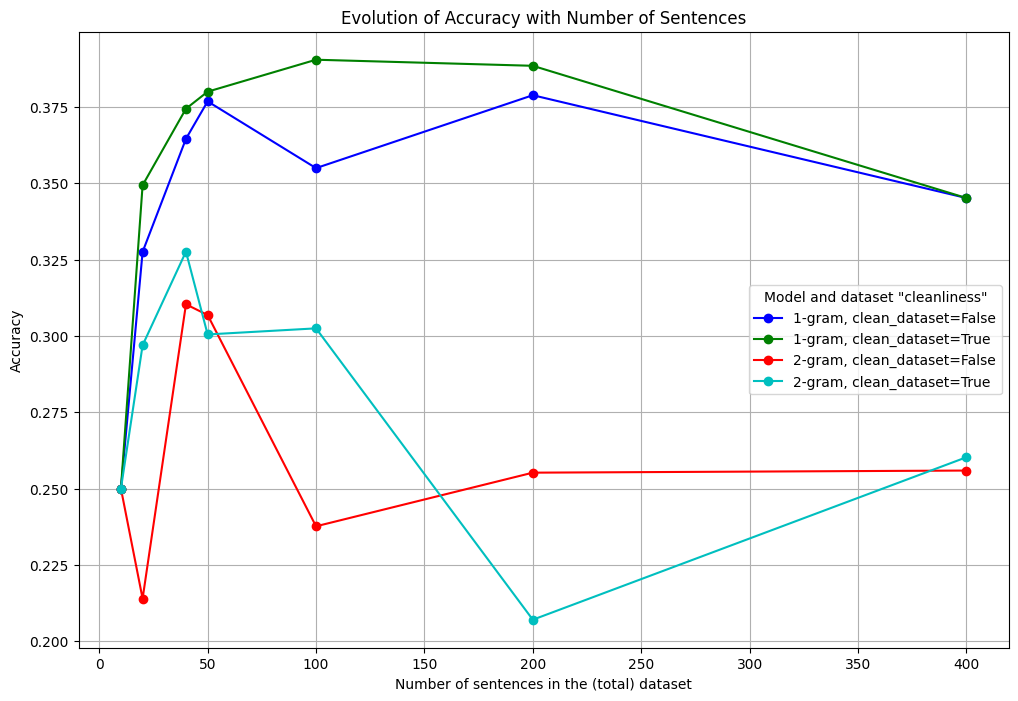

In [38]:
# Plotting the accuracy evolution
plt.figure(figsize=(12, 8))

# Define colors and line styles for better differentiation
colors = ['b', 'g', 'r', 'c']

for i, (model, clean_dataset) in enumerate([(m, c) for m in models for c in clean_dataset_options]):
    subset = df[(df['model'] == model) & (df['clean_dataset'] == clean_dataset)]
    label = f'{model}, clean_dataset={clean_dataset}'
    plt.plot(subset['sentence_nb'], subset['acc'], color=colors[i], marker='o', label=label)

plt.xlabel('Number of sentences in the (total) dataset')
plt.ylabel('Accuracy')
plt.title('Evolution of Accuracy with Number of Sentences')
plt.legend(title='Model and dataset "cleanliness"')
plt.grid(True)

# Save the plot to a file
plt.savefig('accuracy_evolution_plot.png')

plt.show()

## Comparing the execution time and the vocabulary of the 2 methods

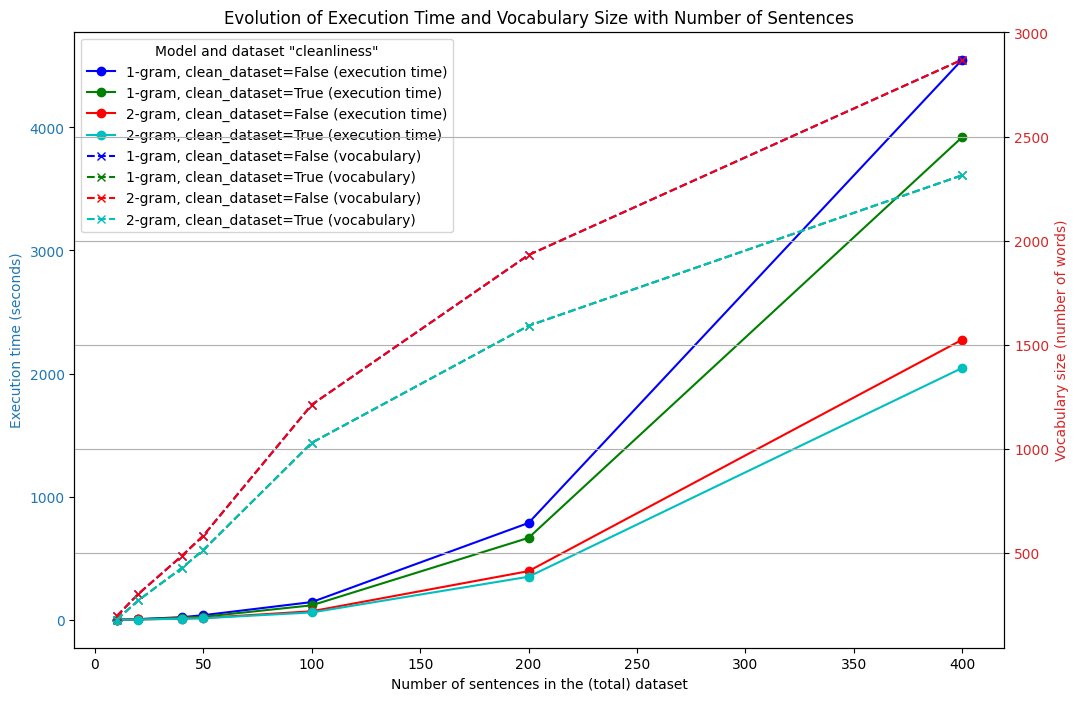

In [41]:
# Plotting the accuracy evolution
fig, ax1 = plt.subplots(figsize=(12, 8))

# Define colors and line styles for better differentiation
colors = ['b', 'g', 'r', 'c']

# Create a first y-axis to plot the execution time
for i, (model, clean_dataset) in enumerate([(m, c) for m in models for c in clean_dataset_options]):
    subset = df[(df['model'] == model) & (df['clean_dataset'] == clean_dataset)]
    label = f'{model}, clean_dataset={clean_dataset}'
    
    ax1.plot(subset['sentence_nb'], subset['execution_time'], color=colors[i], marker='o', label=f'{label} (execution time)')

# Set labels and title for the first y-axis
ax1.set_xlabel('Number of sentences in the (total) dataset')
ax1.set_ylabel('Execution time (seconds)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Evolution of Execution Time and Vocabulary Size with Number of Sentences')

# Create a second y-axis to plot 'vocab'
ax2 = ax1.twinx()
for i, (model, clean_dataset) in enumerate([(m, c) for m in models for c in clean_dataset_options]):
    subset = df[(df['model'] == model) & (df['clean_dataset'] == clean_dataset)]
    label = f'{model}, clean_dataset={clean_dataset}'
    
    ax2.plot(subset['sentence_nb'], subset['vocab'], color=colors[i], linestyle='--', marker='x', label=f'{label} (vocabulary)')

# Set labels for the second y-axis
ax2.set_ylabel('Vocabulary size (number of words)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Combine legends from both y-axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, title='Model and dataset "cleanliness"')

# Save the plot to a file
plt.savefig('execution_time_and_vocab_evolution_plot.png')

plt.grid(True)
plt.show()

Note: for a same training set and the same $clean\_dataset$ parameter, the 1-gram and 2-gram model have the same vocabulary.

## Final evaluation

We select the best performing combination of model and clean_dataset parameter value to conduct a final evaluation on the test subset which remains unexplored until now.

In [31]:
def final_evaluation(model: str, input_file_path: str, sentence_nb: int, clean_dataset: bool = False, val_portion: int = 0.2, test_portion: int = 0.2):
    # Measure execution time
    start_time = time.perf_counter()
    
    # Reduce the dataset with the current sentence nb
    reduce_raw_text('raw_text_wikipedia_en_20220301.txt', 'reduced_raw_text_wikipedia_en_20220301.txt', sentence_nb)
    
    # Data splitting and preparation
    train_set, _, test_set = data_split(input_file_path, val_portion, test_portion)
    
    if clean_dataset:
        # Clean the dataset: convert to lowercase and remove punctuation
        test_set = test_set.lower().translate(str.maketrans('', '', string.punctuation))
        train_set = train_set.lower().translate(str.maketrans('', '', string.punctuation))

    
    words_list_test = data_prep(test_set)[0]
    list_input_2_char = [word[:2] if len(word) >= 2 else word + ' ' for word in words_list_test]
    concatenated_input_2_char = ''.join(list_input_2_char)
    
    # Vocabulary
    vocab = len(set(data_prep(train_set)[0]))
    
    # Prediction
    pred = prediction(input_2_char=concatenated_input_2_char, model=model, train_set=train_set)
    
    # Prints
    print(f'\n\nInput: {concatenated_input_2_char=}')
    print(f'\n\nGround-truth: {test_set=}')
    print(f'\n\nPrediction: {pred=}')
    
    # Accuracy
    acc = accuracy(pred, test_set)
    
    end_time = time.perf_counter()
    execution_time = end_time - start_time
    print(f'\n\n{execution_time=} seconds')
    
    final_result = {
        'sentence_nb': sentence_nb,
        'model': model,
        'clean_dataset': clean_dataset,
        'pred': pred,
        'vocab': vocab,
        'acc': acc,
        'execution_time': execution_time
    }
    
    return final_result

The results of the evaluation of the performance of the 2 methods in different configurations show that **the best performing combination is the 1-gram model with a cleaned dataset** (uncased and punctation removed).

In [40]:
final_result = final_evaluation(model='1-gram', input_file_path='reduced_raw_text_wikipedia_en_20220301.txt', sentence_nb=400, clean_dataset=True)

The first 400 lines have been written to reduced_raw_text_wikipedia_en_20220301.txt
Train text has been written to train_set.txt
Validation text has been written to val_set.txt
Test text has been written to test_set.txt


Input: concatenated_input_2_char='alpousasanaltrfoaupeasof20thisnogoevtorea glancadiasa sttra 20recothitmabea thopfospgrofchwiausuasthwiknfoinoralorwifoinmathauanthprtrcotodathstthefofthglancadiinchwias4 intoalofthcoglancadivenodiwia cogr2 doracotr1 docrtr1 sitrintwofthstwhduwa12an24moa siiminassyefra50waidinthottwstwhduwa3 monosiefwaobthaucotha loduofthdimabenetoacthimofthassyotprdointhtrcaouintrofthdismsasithheofthpaanthpoofa plefinthsuofpewhhaglsethislievthsutha gldimaimsoaubereofa syreonintoadheouamauadfoemevtosumiinfoimmehethindestanruthananagthisteevthmuthmaimsoinvecoannocoskthhabeeareloathytrinchwiaustonpethhashpoefprthisnokncufoauthdeofsycadeoctothexthpelothdiofasthocsoafintransonoitisnoknhoofthouharerainunsaharafr3 to25moauchaclabyagfioryotha fehadecoskinlaye

In [42]:
# Convert the list of results to a pandas dataframe
final_df = pd.DataFrame(final_result, index=[0])

In [43]:
# Display the dataframe
display(final_df)

,sentence_nb,model,clean_dataset,pred,vocab,acc,execution_time
0,400,1-gram,True,also political use as and also traditions for ...,2314,0.364379,3670.431526


In [44]:
# Save the dataframe to a CSV file
final_df.to_csv('final_evaluation.csv', index=False)